<a href="https://colab.research.google.com/github/indrasuthar07/DOG-VS-CAT/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dataset from kaggle

In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:03<00:00, 230MB/s]
100% 812M/812M [00:03<00:00, 263MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images', file_count)

Number of images 25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.9610.jpg', 'dog.4920.jpg', 'cat.1714.jpg', 'cat.8778.jpg', 'cat.11527.jpg', 'dog.7766.jpg', 'cat.10723.jpg', 'cat.12337.jpg', 'dog.9811.jpg', 'dog.1305.jpg', 'cat.7294.jpg', 'cat.3854.jpg', 'dog.8325.jpg', 'dog.10950.jpg', 'cat.2963.jpg', 'dog.5098.jpg', 'dog.5209.jpg', 'cat.3886.jpg', 'cat.3138.jpg', 'cat.2153.jpg', 'cat.8392.jpg', 'cat.3707.jpg', 'cat.12255.jpg', 'cat.6634.jpg', 'cat.1382.jpg', 'cat.7054.jpg', 'cat.6276.jpg', 'dog.3878.jpg', 'cat.5395.jpg', 'dog.2622.jpg', 'cat.1728.jpg', 'dog.4401.jpg', 'cat.2972.jpg', 'cat.6849.jpg', 'cat.2373.jpg', 'dog.4805.jpg', 'cat.3641.jpg', 'dog.5188.jpg', 'cat.1617.jpg', 'dog.5849.jpg', 'cat.2595.jpg', 'dog.6700.jpg', 'dog.4049.jpg', 'cat.1064.jpg', 'cat.1701.jpg', 'cat.11896.jpg', 'cat.7099.jpg', 'dog.7806.jpg', 'cat.8314.jpg', 'cat.4106.jpg', 'dog.4087.jpg', 'dog.5695.jpg', 'cat.2102.jpg', 'cat.11778.jpg', 'dog.6025.jpg', 'dog.10687.jpg', 'cat.8426.jpg', 'cat.4008.jpg', 'cat.9229.jpg', 'dog.5680.jpg', 'dog.1212.jpg', 'cat.8434.jpg',

importing dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow



Displaying the images of dogs and cats

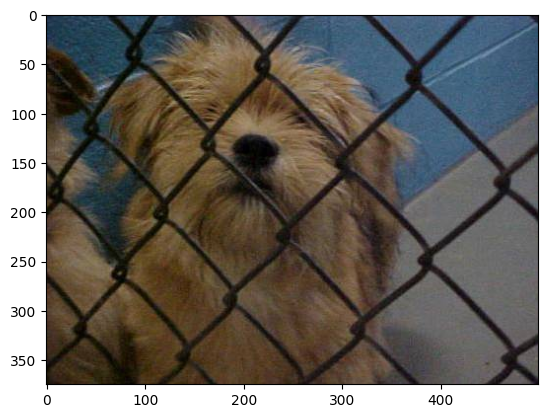

In [ ]:
#display dog image
img = mpimg.imread('/content/train/dog.10076.jpg')
imgplt = plt.imshow(img)
plt.show()

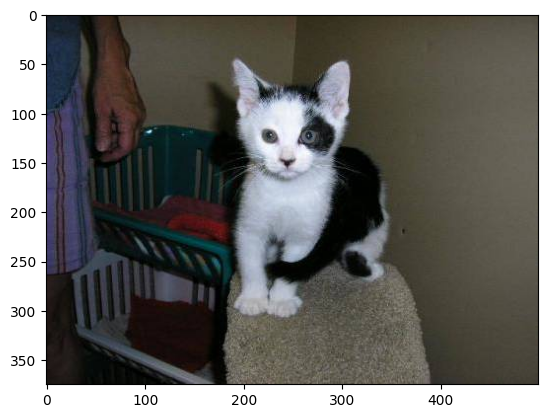

In [ ]:
#display the image of cat
img = mpimg.imread('/content/train/cat.2075.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')
dog_count =0
cat_count = 0
for i in range(len(file_names)):
  name = file_names[i]
  if(name[0:3] == 'dog'):
    dog_count+=1
  else:
    cat_count +=1
print('Number of dog images :', dog_count)
print("Number of cat images :", cat_count)


Number of dog images : 12500
Number of cat images : 12500


Resizing all the images

In [ ]:
#creating a directry for resize images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'
for i in range(2000):
  filename = os.listdir( original_folder)[i]
  img_path = os.path.join(original_folder, filename)
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgpath = os.path.join(resized_folder, filename)
  img.save(newImgpath)

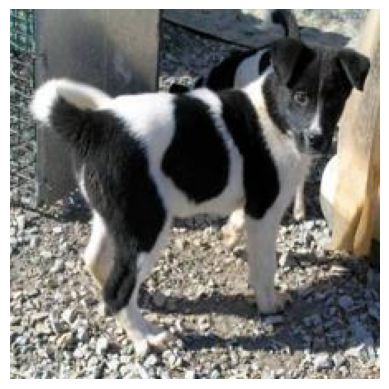

In [ ]:
import random

resized_folder = '/content/image resized/'
file_names = os.listdir(resized_folder)
if file_names:
  img_name = random.choice(file_names)
  img_path = os.path.join(resized_folder, img_name)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
else:
  print(f"No images found in {resized_folder}")

Creating labels for resized images

In [ ]:
labels = []
filenames = os.listdir('/content/image resized/')
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if(label=='dog'):
    labels.append(1)
  else:
    labels.append(0)



In [ ]:
print(labels[0:5]
      )
print(len(labels))

[0, 1, 0, 0, 0]
2000


Converting all the resized images into numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files=[]

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[129 158 179]
   [132 161 182]
   [137 166 187]
   ...
   [100  98  97]
   [ 95  93  92]
   [ 92  90  89]]

  [[128 157 178]
   [131 160 181]
   [135 164 185]
   ...
   [103 101 100]
   [ 99  97  96]
   [ 96  94  93]]

  [[131 160 181]
   [133 162 183]
   [135 164 185]
   ...
   [102 103 101]
   [100 101  99]
   [ 98  99  97]]

  ...

  [[ 59  83 105]
   [ 62  86 108]
   [ 63  90 111]
   ...
   [  1  17  24]
   [  0  16  23]
   [  0  15  22]]

  [[ 64  88 110]
   [ 65  89 111]
   [ 65  91 115]
   ...
   [  1  17  24]
   [  0  15  24]
   [  0  15  24]]

  [[ 69  93 115]
   [ 68  92 114]
   [ 65  91 115]
   ...
   [  2  18  25]
   [  0  16  25]
   [  0  15  24]]]


 [[[ 80  78  77]
   [ 87  85  84]
   [ 83  79  78]
   ...
   [209 177 142]
   [212 177 137]
   [209 174 131]]

  [[ 77  75  74]
   [ 84  82  81]
   [ 81  77  76]
   ...
   [205 173 138]
   [209 174 134]
   [208 173 130]]

  [[ 72  70  69]
   [ 80  78  77]
   [ 79  75  74]
   ...
   [200 170 135]
   [207 174 135]
   [209 174

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
x = dog_cat_images
y = np.asarray(labels)

**Train Test split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.25882353 0.19215686 0.14117647]
   [0.30196078 0.23529412 0.18431373]
   [0.42352941 0.35686275 0.30588235]
   ...
   [0.27058824 0.26666667 0.25098039]
   [0.15686275 0.15294118 0.1372549 ]
   [0.10588235 0.10196078 0.08627451]]

  [[0.40392157 0.3372549  0.28627451]
   [0.25490196 0.18823529 0.1372549 ]
   [0.20784314 0.14117647 0.09019608]
   ...
   [0.14509804 0.14117647 0.1254902 ]
   [0.09803922 0.09411765 0.07843137]
   [0.12156863 0.11764706 0.10196078]]

  [[0.34117647 0.2745098  0.22352941]
   [0.35294118 0.28627451 0.23529412]
   [0.29411765 0.22745098 0.17647059]
   ...
   [0.07058824 0.0627451  0.05882353]
   [0.07058824 0.0627451  0.05882353]
   [0.14117647 0.13333333 0.12941176]]

  ...

  [[0.59215686 0.55294118 0.48627451]
   [0.65490196 0.62352941 0.55686275]
   [0.63921569 0.61960784 0.56078431]
   ...
   [0.7372549  0.59215686 0.51372549]
   [0.76862745 0.56078431 0.47843137]
   [0.66666667 0.43137255 0.34509804]]

  [[0.56078431 0.51372549 0.44313725]
   [0.6

**Buiding Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:


from tensorflow.keras.applications import MobileNetV2

pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
num_of_classes = 2
inputs = tf.keras.Input(shape=(224, 224, 3))

x = pretrained_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7873 - loss: 0.4336
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9658 - loss: 0.0996
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9857 - loss: 0.0656
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9804 - loss: 0.0631
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9848 - loss: 0.0568


In [ ]:
score,acc = model.evaluate(x_test_scaled, y_test)
print('Test loss:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9784 - loss: 0.0561
Test loss: 0.05107371509075165
Test accuracy: 0.9825000166893005


**Predictive  system**

path of image/WIN_20240914_20_55_31_Pro.jpg


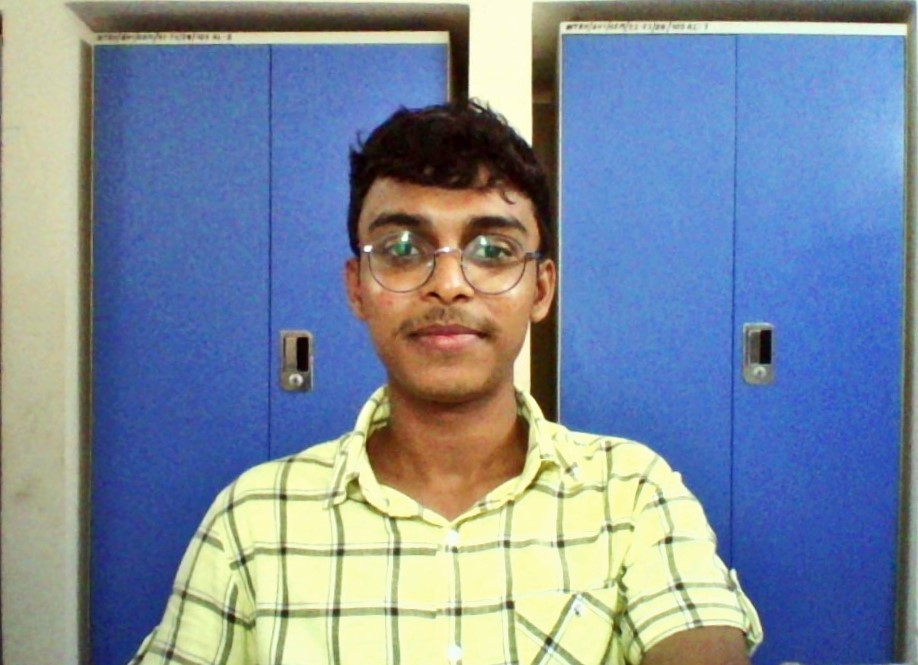

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.09097417 0.90902585]]
1
The image represent a Dog


In [ ]:
input_image_path = input('path of image')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label ==0:
  print('The image represent a Cat')
else:
  print('The image represent a Dog')